In [1]:
cd(@__DIR__)
include(raw"utils\utils.jl")

Undrift!

Making a calendar of 100 years

In [2]:
try 
    using Dates
catch ; 
    import Pkg
    Pkg.add("Dates")
    using Dates
end
k=100
DatesRange=collect(Date(1900):Day(1):Date(1900+k))
N=length(DatesRange)

36525

# AR model on the whole series

## AR(1)

In [3]:
x0=-3.
Φ,σ=0.6,6

(0.6, 6)

In [4]:
include("utils/Simulation.jl")
x=[x0 ; simulation(x0,Φ,σ,N-length(x0))]

36525-element Vector{Float64}:
  -3.0
   7.037399903157977
   2.9123015716038267
   4.510420950335721
   1.0313624994985988
  -3.467251526973807
   5.068903990017822
   9.880058799912936
   7.969256076826138
   5.780643642306649
   ⋮
  -3.85120479502393
  -0.19127043270696076
  -7.832491117901976
  -5.494312884332742
  -6.170251977930357
 -10.87779080317669
 -11.406897934741428
  -2.5178016941881722
 -14.8886213366667

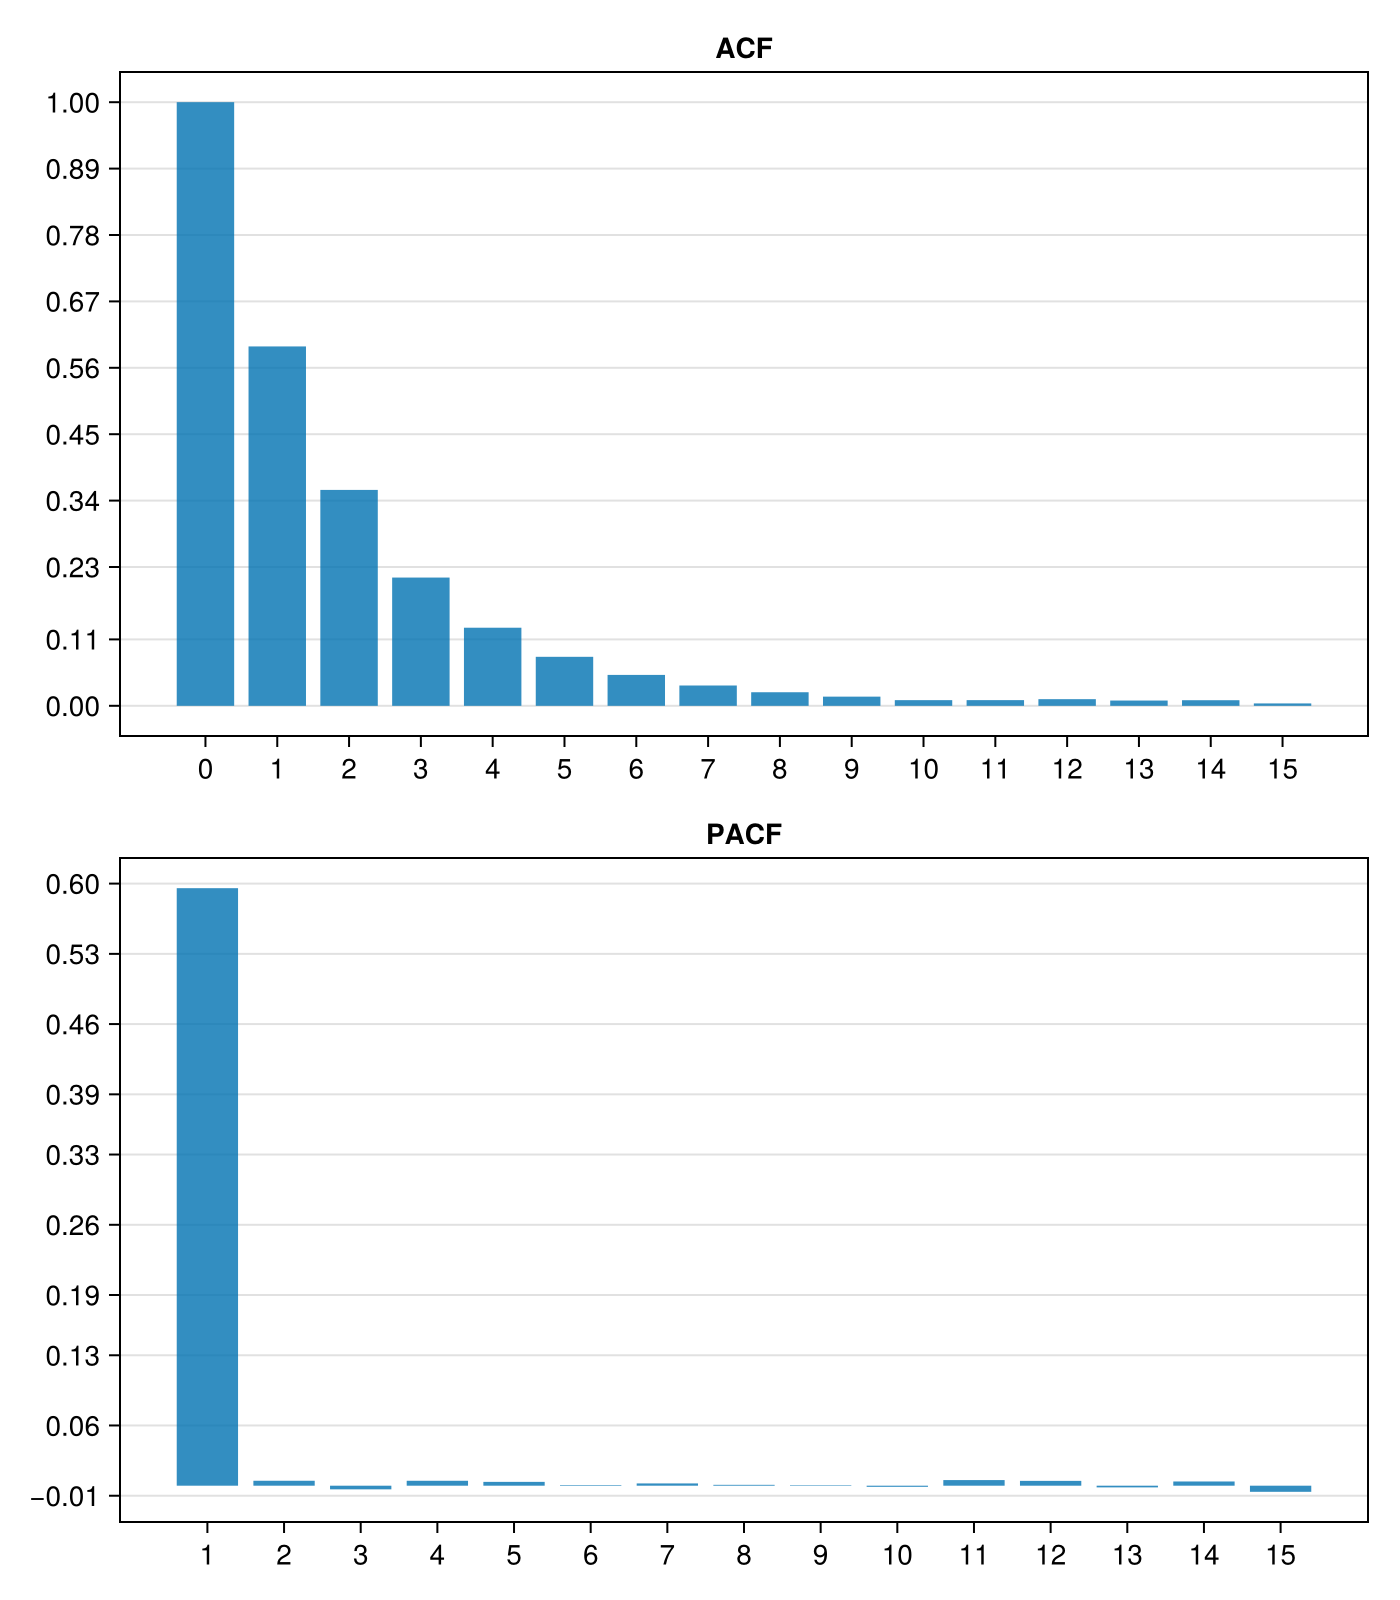

In [5]:
include("utils/ACF_PACF.jl")
ACF_PACF(x)

In [6]:
include("utils/Estimation.jl")
Parameters_est=LL_AR_Estimation(x,1)
Φ_hat,  σ_hat=Parameters_est[1][1], Parameters_est[2]
table = DataFrame("Parameters"=>"Φ", "Error"=>abs(Φ_hat-Φ), "Percentage error"=>100*abs(Φ_hat-Φ)/abs(Φ))
push!(table,("σ",abs(σ_hat-σ),100*abs(σ_hat-σ)/abs(σ)))

Row,Parameters,Error,Percentage error
,String,Float64,Float64
1,Φ,0.0045466,0.757767
2,σ,0.0337598,0.562663


# AR model on each month

Parameters for each month

In [7]:
Φ_month=[5,-7,2,7,-2,7,-5,6,3,1,4,-2] / 10
σ_month=[1.5,2,4.5,7,8,3,4.5,1,7,2.5,3,6]

12-element Vector{Float64}:
 1.5
 2.0
 4.5
 7.0
 8.0
 3.0
 4.5
 1.0
 7.0
 2.5
 3.0
 6.0

Generation of the series associated

In [8]:
n_month=200
x=SimulateMonth(4.,Date(2000,11,1),Φ_month,σ_month,n_month)
Date_vec=collect(Date(2000,11,1):(Date(2000,11,1) + Month(n_month) - Day(1)))
Monthly_temp=MonthlySeparateX(x,Date_vec)

12-element Vector{Vector{AbstractVector}}:
 [[-4.559691870392024, -0.46567110072339224, 2.6947684153657185, 0.09094987602614735, 1.3015903577673498, 0.24473273770291315, 1.7522359499263667, 0.09963909846296859, -0.04406279889703038, -0.6530347127014143  …  -1.8214547793962412, -2.552504223538346, -1.9957562527808137, -4.109281001648633, -1.9434507735842397, -0.8200080614865217, 0.9941771035859477, -2.344763261363204, -0.5743037707360505, 0.2701225561488674], [0.9342129014738021, -0.9001686211281682, 1.8293783705792914, 0.5417681976941033, 3.118611642061756, 3.0157372585074667, 1.7143168001994327, 0.6781287188442181, -1.1390871979447985, -0.13853860183570355  …  -0.7956945345431723, 1.2743173141883655, 2.5581799177278164, 3.7658517560945906, 0.6910441826678828, 1.7272493095166666, 1.8011365945154962, -1.1700239331652469, -0.7260627227861546, -0.8095876068065859], [-6.383886268939689, -0.9381024238273614, -3.1252279644518444, -2.3109455682585254, -0.31238090291922094, 0.21561075952307657

## Autocorrelations

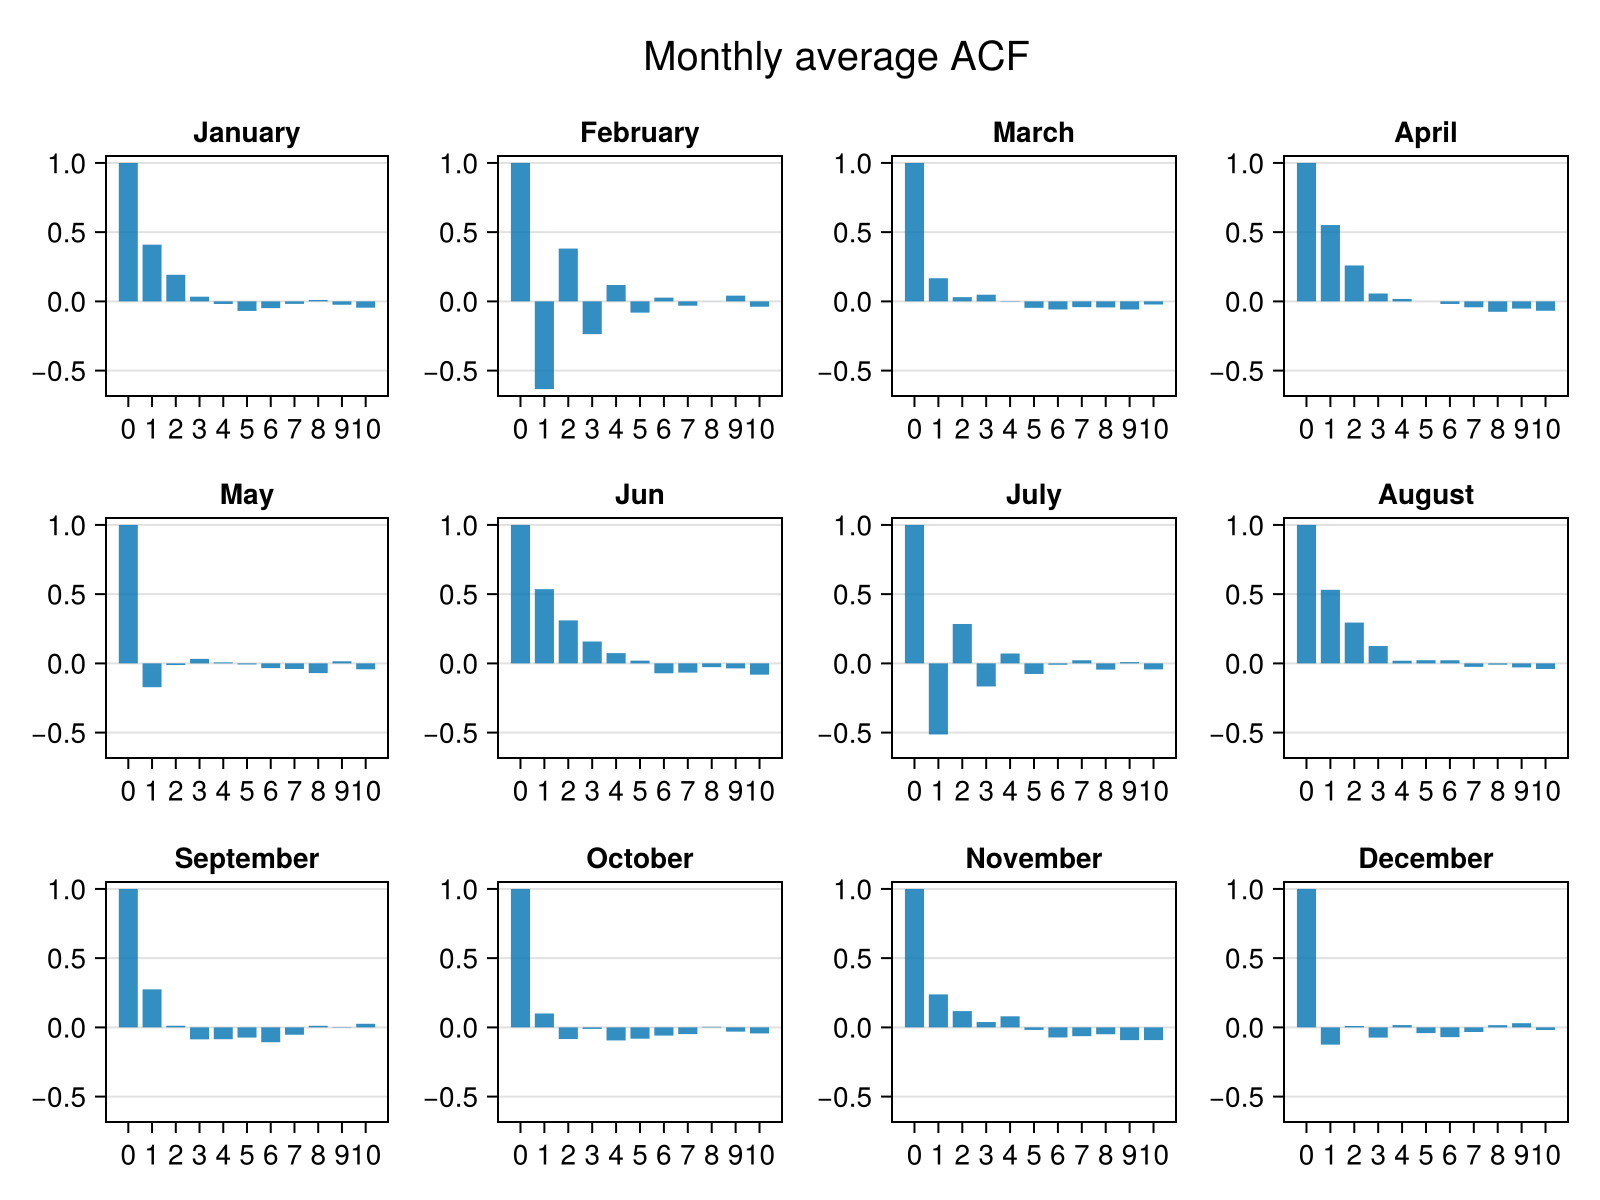

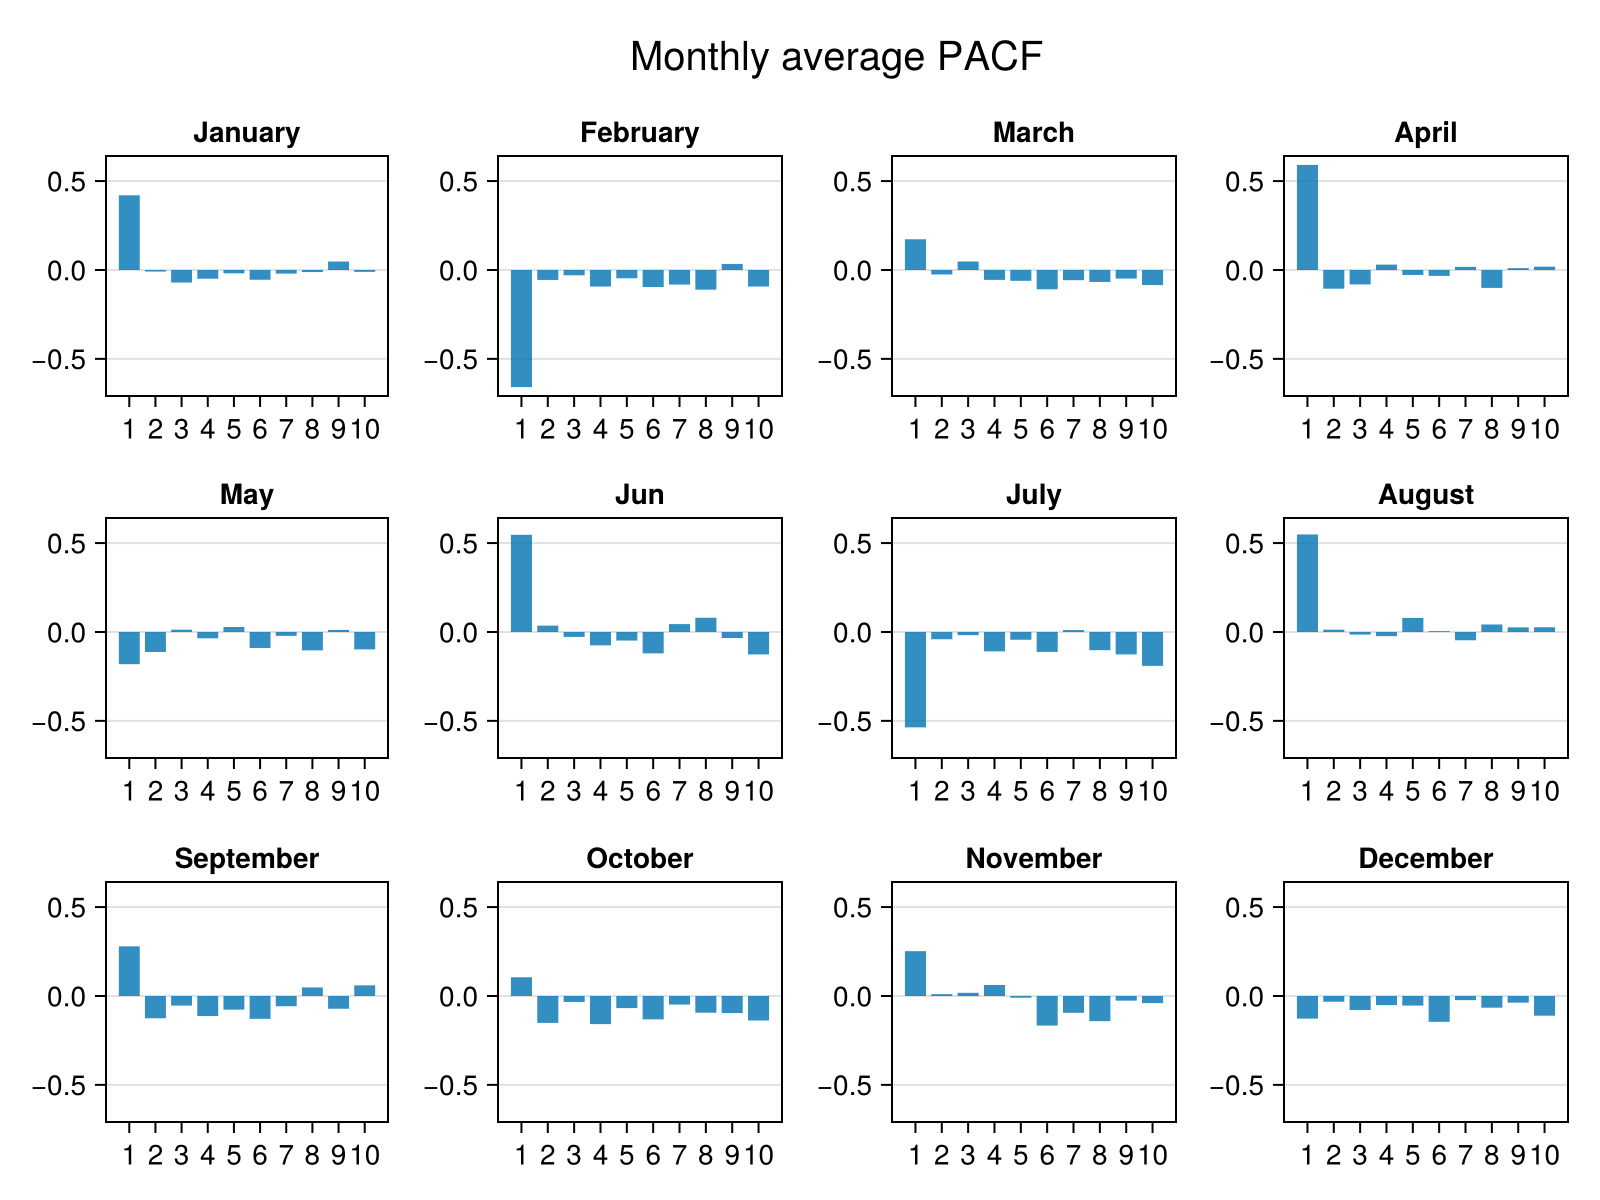

CairoMakie.Screen{IMAGE}


In [9]:
display(MonthlyACF(Monthly_temp))
display(MonthlyPACF(Monthly_temp))

## Estimating models

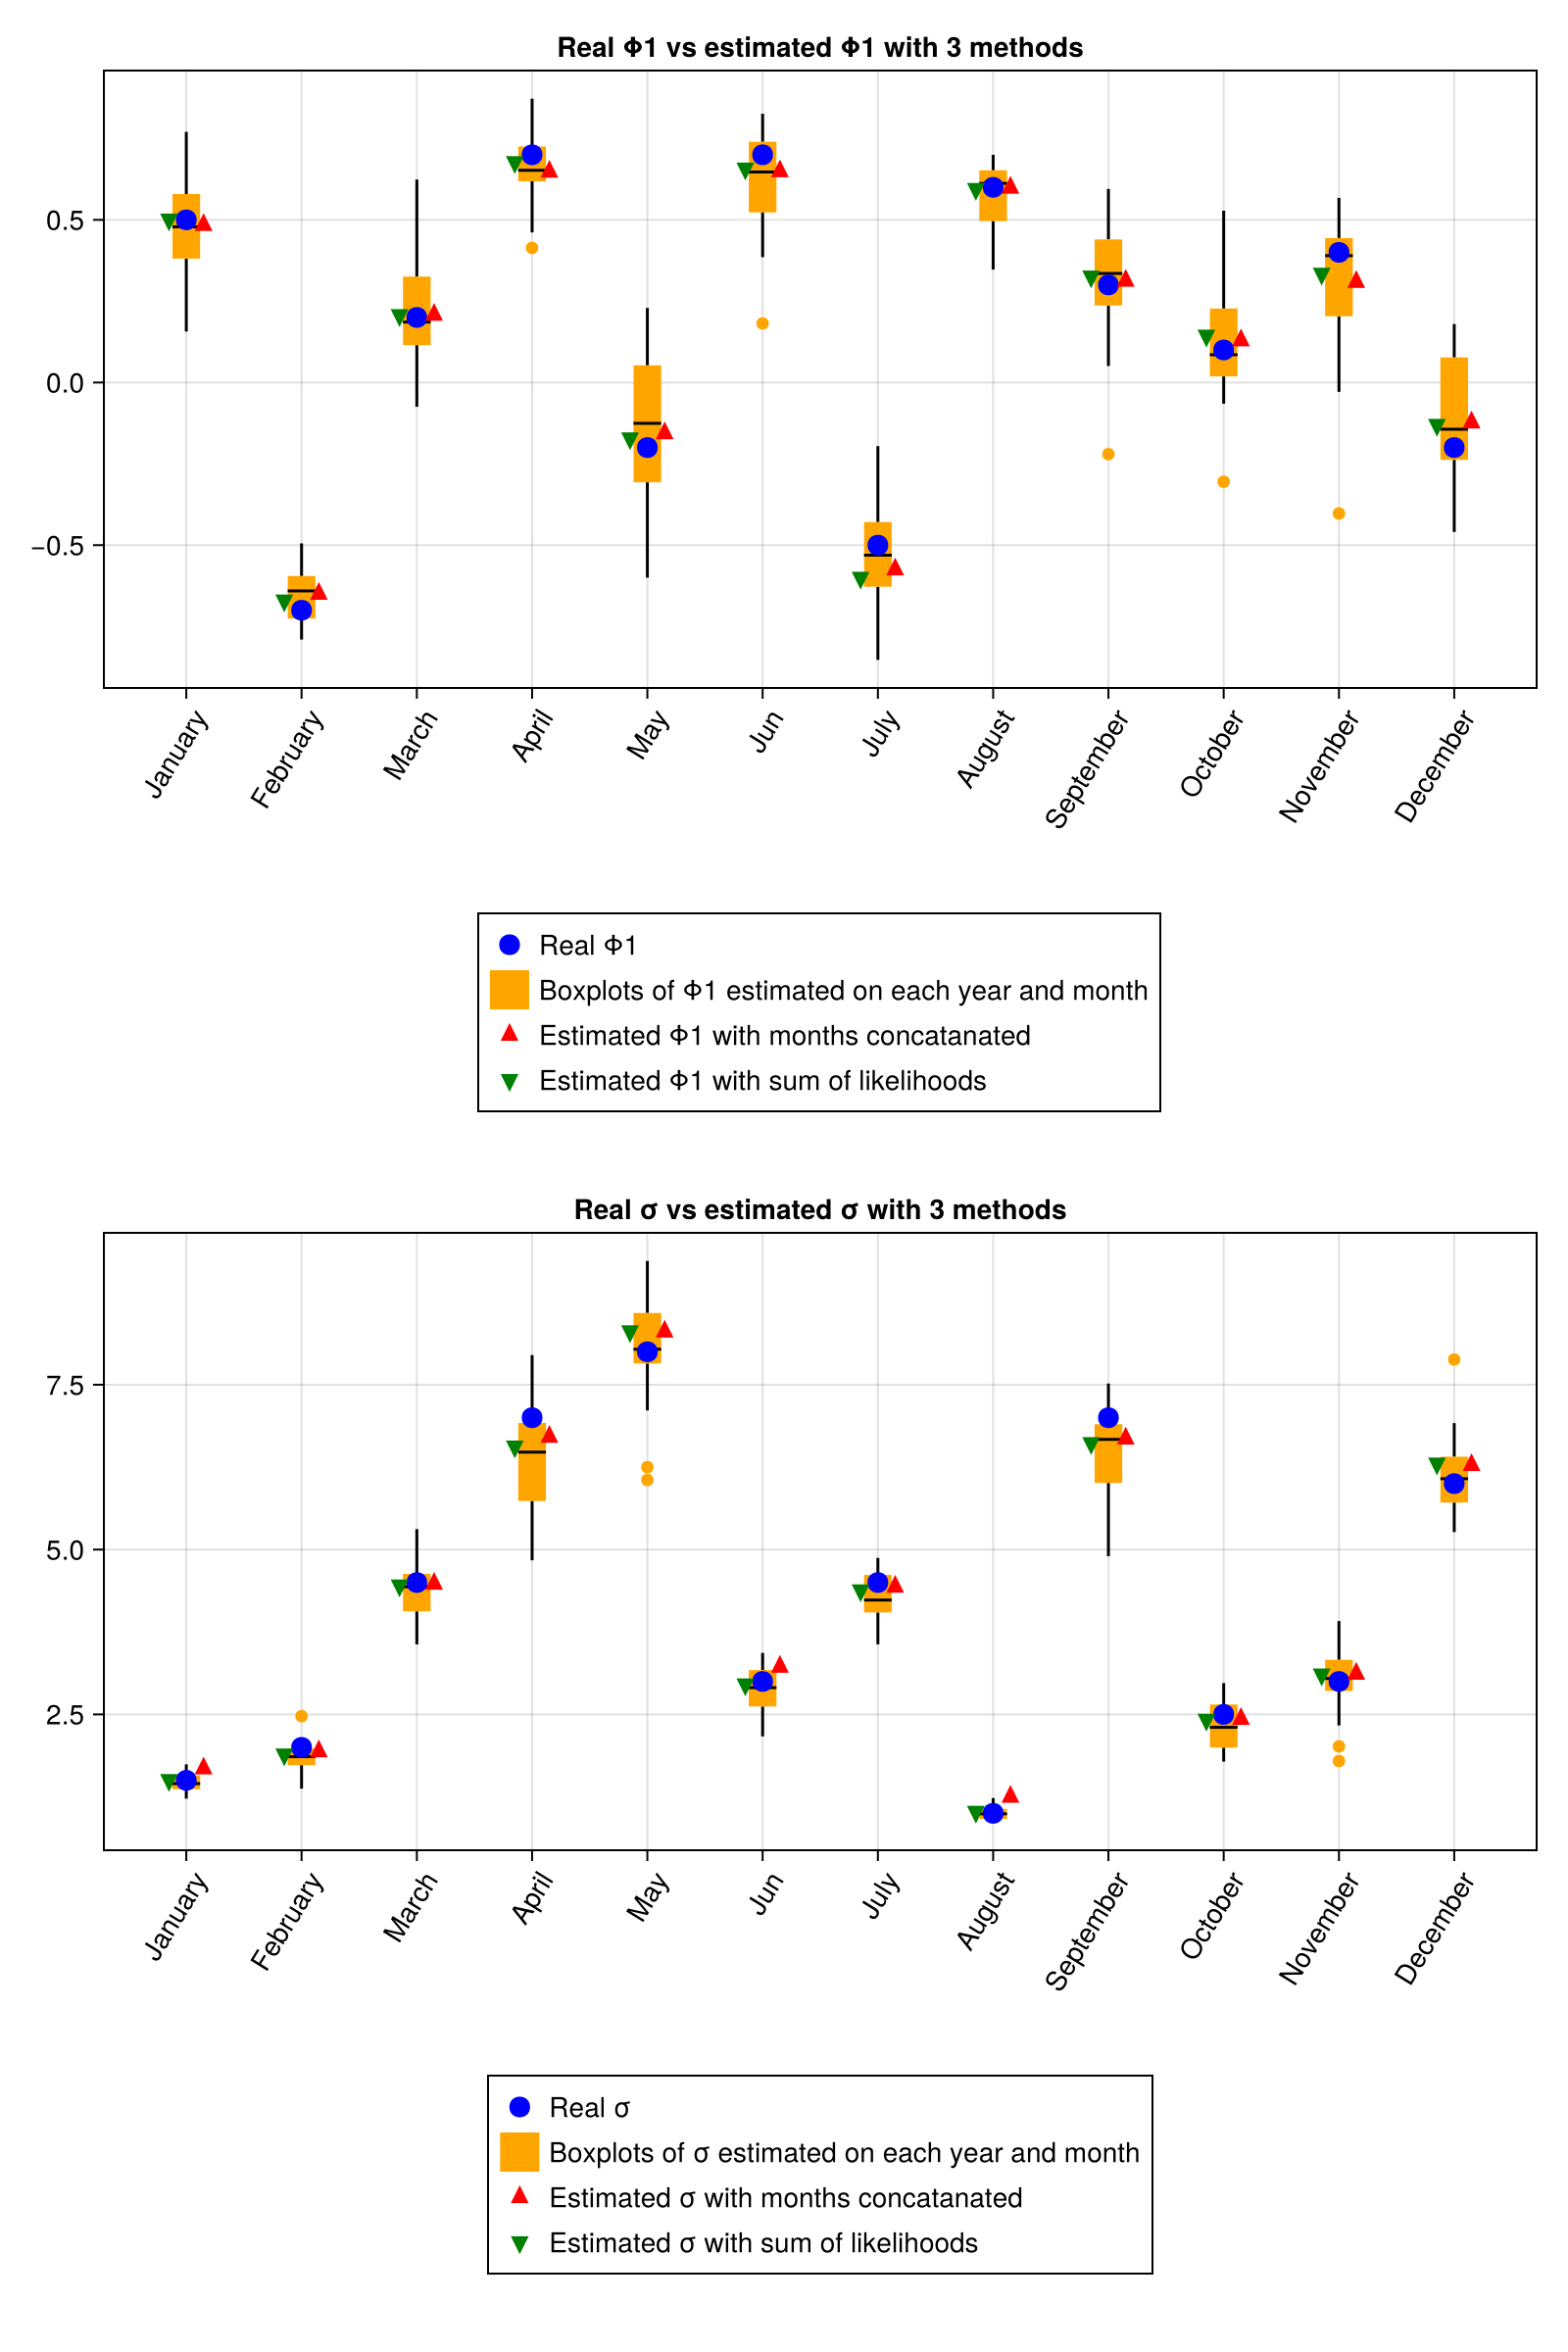

Row,Parameter,Month concatanation,Sum LL,mean of monthly parameters,median of monthly parameters
,String,Float64,Float64,Float64,Float64
1,Φ1,13.4228,13.0385,14.3024,11.4069
2,σ,6.10064,3.38362,4.04096,3.74242


6

In [10]:
include(raw"utils\Estimation.jl")
Parameters,autofig,PercentageErrorTable=AllEstimation(x,1,Date_vec=Date_vec,TrueParamVec=[Φ_month,σ_month])
display(autofig)
display(PercentageErrorTable)

In [13]:
include("utils/Simulation.jl")
Φ_vec, σ_vec = AutoTakeParameters((Parameters,PercentageErrorTable))
n_years=10
sim=SimulateScenarios([4.],Date(2001,1,1):(Date(2001,1,1) + Year(n_years-1)),Φ_vec, σ_vec,n=10)
sample_=GatherYearScenarios(sim,Date(2001,1,1):(Date(2001,1,1) + Year(n_years-1)))


366-element Vector{Vector{AbstractFloat}}:
 [4.0, -6.032891964940347, 0.26329055497796894, -0.846185085823985, 3.941945965720339, -2.0954872328426464, -0.8150146154335316, -0.8054932862813327, 1.3075530696699194, -4.067344606980771  …  4.0, -0.200375342106967, 0.7533262288076392, 1.9266921763400036, 2.4172691528675703, 0.864398886686505, -2.059019837813667, -5.0792701206981885, 4.090026199314868, -1.8965149548015146]
 [2.0956015032322473, -1.2530495610988086, 0.15963767184888536, -1.2530249668765163, 3.1660805982593976, -0.10513098955539613, 0.41236937787915295, -0.8183429117433261, 0.4456175134691595, 2.40259892497422  …  0.1809367357673175, 1.6640885822632951, 2.5453883937563186, 2.661682944302921, 2.8925408615783192, -2.9477456005087017, -0.581641995696034, -0.8455915548100383, -3.9877172353891672, 1.641312721235808]
 [-0.2817908618327114, -0.37017429840852933, 0.2613446505249215, -2.344543026796645, -1.3008074648813512, -2.990429787020025, 1.9427731935716674, 2.943862811536002, 0.8

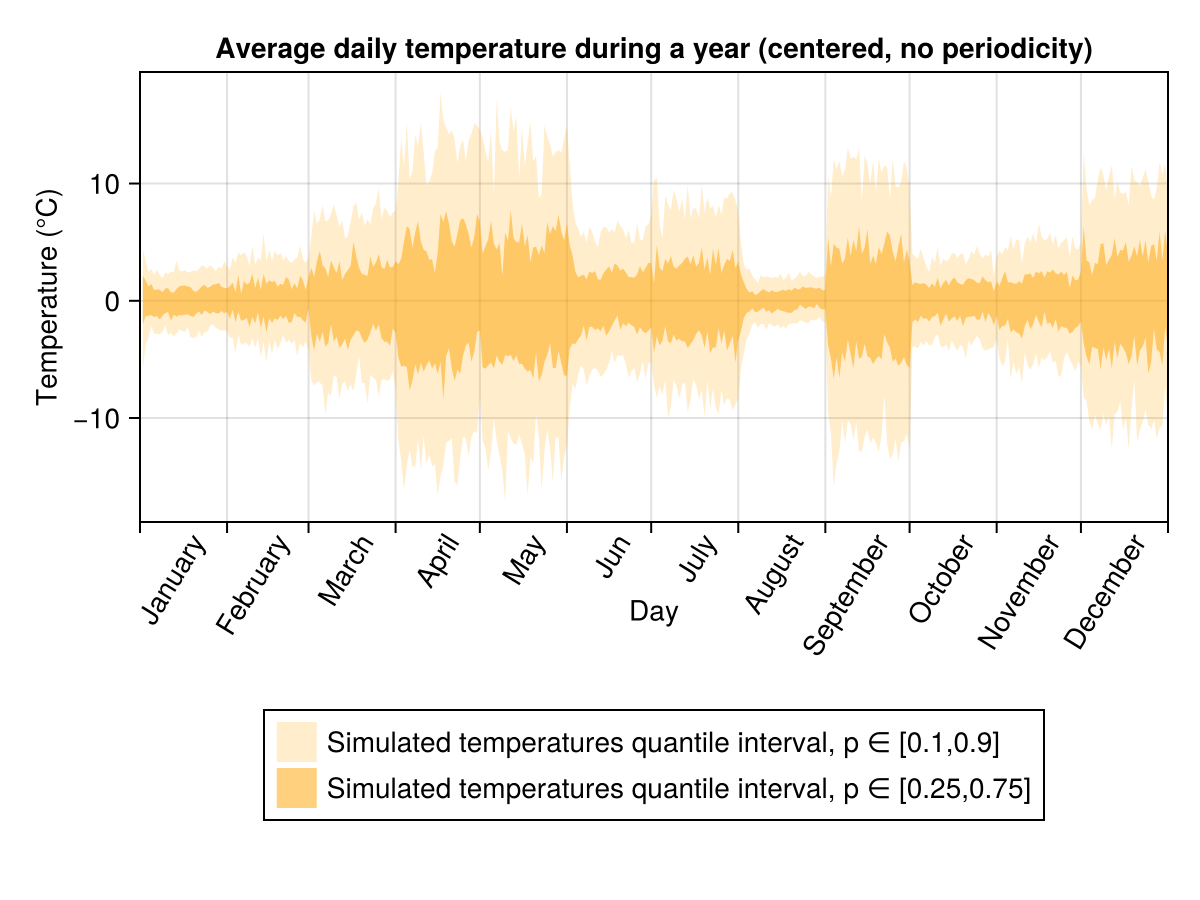

In [15]:
include("utils/Plotting.jl")
PlotYearCurves([],
["Simulated temperatures quantile interval, p ∈ [0.1,0.9]","Simulated temperatures quantile interval, p ∈ [0.25,0.75]"],
"Average daily temperature during a year (centered, no periodicity)",
[(quantile.(sample_,0.05),quantile.(sample_,0.95)),(quantile.(sample_,0.25),quantile.(sample_,0.75))],
[("orange",0.2),("orange",0.5)]
)